# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [58]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].values.astype(int) #here modified to .values 
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

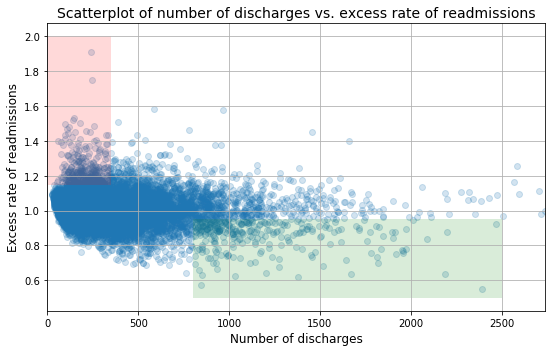

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
import seaborn as sns
from statsmodels.stats.weightstats import ztest 

In [6]:
#examine the dataframe
clean_hospital_read_df.head()
#there are NaN in Excess Readmission Ratio (ERR)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [8]:
print(clean_hospital_read_df.shape)
print(clean_hospital_read_df.isnull().sum())

(11578, 12)
Hospital Name                     0
Provider Number                   0
State                             0
Measure Name                      0
Number of Discharges              0
Footnote                      11497
Excess Readmission Ratio         81
Predicted Readmission Rate       81
Expected Readmission Rate        81
Number of Readmissions           81
Start Date                        0
End Date                          0
dtype: int64


Here we can see that, Excess Readmission Ratio (ERR), together with Predicted and Expected rate that calculated ratio and Number of Readmisssions have the same number of null values, so we can just delele the NaN rows where values regarding readmission are involved. 

In [9]:
#drop NaN rows 
df = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'].notnull()]

('pearson_r:', -0.09739794351079353, 'P-value:', 1.222547377680967e-25)


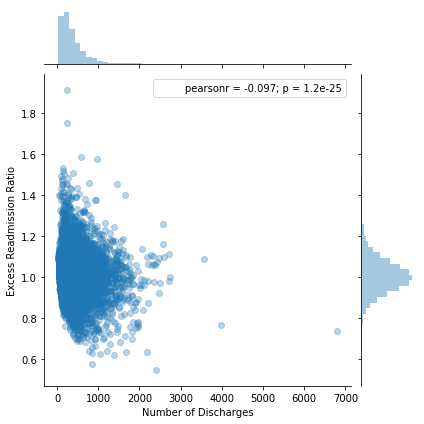

In [10]:
#first we examine the correlation
from scipy.stats import pearsonr
pearson_r, pValue = pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])
print('pearson_r:', pearson_r, 'P-value:', pValue)
# Scatter plot and histograms
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=df, alpha =0.3)
plt.show()

**Exercise A:**  

So here we can see that we have an extremely small p-value that indicates the correlation exists, but the calculated the correlation coefficient is a negative value that is very far away from -1, so it is a fairly weak negative correlation, as can be see from the joint distribution plot as well.

In [11]:
#subgroups
df_le100 = df[df['Number of Discharges'] < 100]
df_mo1000 = df[df['Number of Discharges'] > 1000]

In [12]:
#mean, and proportions for <100 
print(df_le100['Excess Readmission Ratio'].describe())
print('ratio > 1(percentage) for  <100 :', df_le100[df_le100['Excess Readmission Ratio']>1]['Excess Readmission Ratio'].count()/float(len(df_le100))*100)
#mean, and proportions for >1000 
print(df_mo1000['Excess Readmission Ratio'].describe())
print('ratio > 1(percentage): for >1000', df_mo1000[df_mo1000['Excess Readmission Ratio']>1]['Excess Readmission Ratio'].count()/float(len(df_mo1000))*100)

count    1188.000000
mean        1.022618
std         0.057979
min         0.893500
25%         0.984900
50%         1.017750
75%         1.052925
max         1.495300
Name: Excess Readmission Ratio, dtype: float64
('ratio > 1(percentage) for  <100 :', 63.215488215488215)
count    463.000000
mean       0.978335
std        0.120007
min        0.549500
25%        0.907900
50%        0.986400
75%        1.057100
max        1.454300
Name: Excess Readmission Ratio, dtype: float64
('ratio > 1(percentage): for >1000', 44.49244060475162)


So the stats are correct about the subgroups of 'Number of Discharges' <100 and 'Number of Discharges' >1000, but let's further do visual EDA for each subgroup.

('pearson_r:', -0.2446355003347625, 'P-value:', 1.195592784553268e-17)


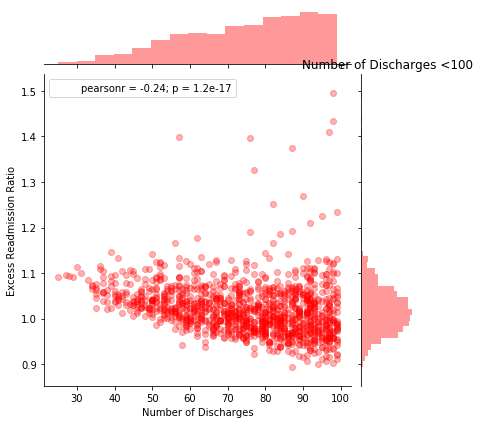

In [13]:
#correlations for <100 
pearson_r, pValue = pearsonr(df_le100['Number of Discharges'], df_le100['Excess Readmission Ratio'])
print('pearson_r:', pearson_r, 'P-value:', pValue)
# Scatter plot and histograms
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=df_le100, color = 'red', alpha = 0.3)
plt.title('Number of Discharges <100')
plt.show()

('pearson_r:', -0.0792766567903635, 'P-value:', 0.08839944177056586)


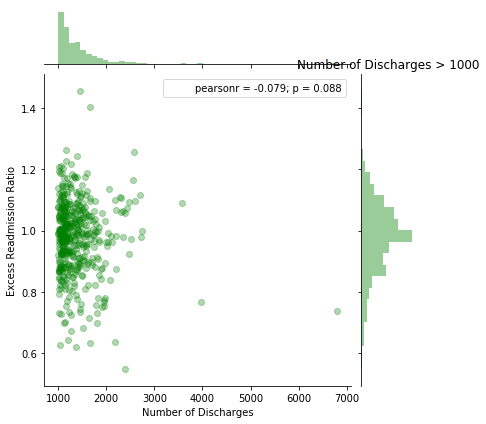

In [14]:
#correlations for >1000
pearson_r, pValue = pearsonr(df_mo1000['Number of Discharges'], df_mo1000['Excess Readmission Ratio'])
print('pearson_r:', pearson_r, 'P-value:', pValue)
# Scatter plot and histograms
sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=df_mo1000, color = 'green', alpha =0.3)
plt.title('Number of Discharges > 1000')
plt.show()

count    1188.000000
mean       74.717172
std        16.908819
min        25.000000
25%        62.000000
50%        77.000000
75%        89.000000
max        99.000000
Name: Number of Discharges, dtype: float64
(-0.0008388300181880277, 1.085293356678823)


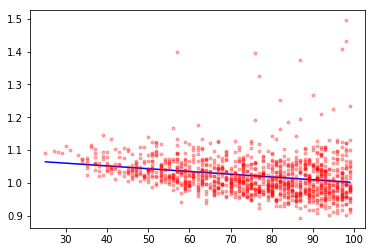

In [55]:
# perform regressions on subgroups
print(df_le100['Number of Discharges'].describe())
a1, b1 = np.polyfit(df_le100['Number of Discharges'],df_le100['Excess Readmission Ratio'] ,1)
print(a1, b1)
x_theor = np.array([25, 99])
y_theor = a1 * x_theor + b1
plt.plot(x_theor, y_theor, color = 'blue')
plt.plot(df_le100['Number of Discharges'],df_le100['Excess Readmission Ratio'], marker ='.', linestyle='none', color ='red', alpha= 0.3)
plt.show()

count     463.000000
mean     1383.427646
std       459.109724
min      1002.000000
25%      1107.000000
50%      1242.000000
75%      1512.000000
max      6793.000000
Name: Number of Discharges, dtype: float64
(-2.0722239748079e-05, 1.007003140516453)


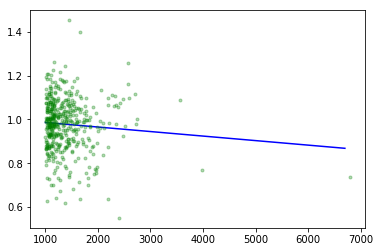

In [57]:
print(df_mo1000['Number of Discharges'].describe())
a2, b2 = np.polyfit(df_mo1000['Number of Discharges'],df_mo1000['Excess Readmission Ratio'] ,1)
print(a2, b2)
x_theor = np.array([1002,6700])
y_theor = a2 * x_theor + b2
plt.plot(x_theor, y_theor, color = 'blue')
plt.plot(df_mo1000['Number of Discharges'],df_mo1000['Excess Readmission Ratio'], marker ='.', linestyle='none', color ='green', alpha= 0.3)
plt.show()

The joint distribution plots as well as the regression analysis show that ERR has a relatively stronger correlation with Number of Discharges when Number of discharges is less than 100 than more than 1000. So I wouldn't agree with the statement that 'significant correlation between hospital capacity (number of discharges) and readmission rates.' Also, there are many factors affecting readmissions, so we're not sure what causes the higher ERR in Number of Discharges < 100. 

(An additional plot is provided as below to prove the point, as we can see clearly that ERR for 'READM-30-HIP-KNEE-HRRP' category is more associated with Number of Discharges than other 4 types.) 

For the recommendation part, I think first of all, preliminary analysis only compared the parts where Number of Discharges < 100 and > 1000, and therefore even if small facilities need to demonstrate upgraded resource allocation as suggested, those small facilities should only be limited to Number of Discharges < 100 based on analysis. For the second part, there are many factors that might be associated with ERR >1, facility sizes might be only one of them. So further analysis needs to done before recommending where the most efforts should be put.

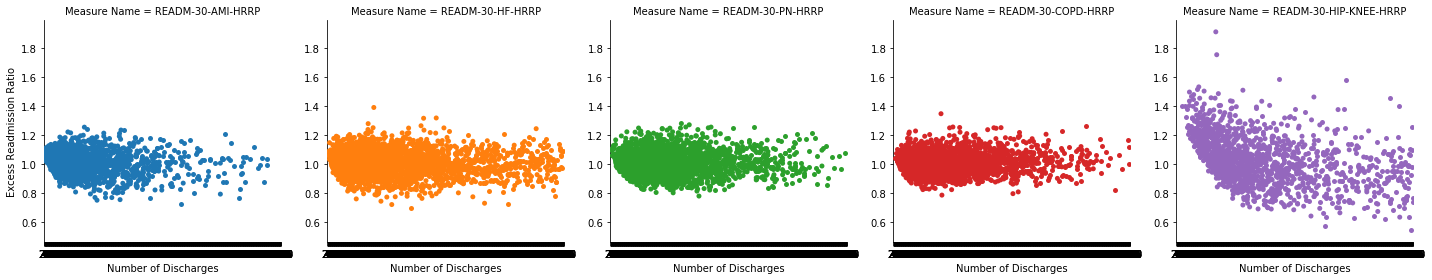

In [96]:
#additional plot:other factors that might affect the ERR
sns.factorplot(x='Number of Discharges', y='Excess Readmission Ratio', data=df, hue='Measure Name', col= 'Measure Name', kind='strip') 
plt.show() 

**Exercise B**:

Next we're moving on to our own analysis. Before anything else, we plot the distribution of ERR for the two subgroups first.

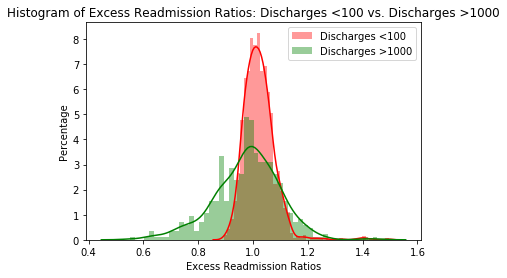

In [15]:
plt.figure()
sns.distplot(df_le100['Excess Readmission Ratio'], bins = 50, norm_hist = True, color = 'red', label = 'Discharges <100')
sns.distplot(df_mo1000['Excess Readmission Ratio'], bins = 50, norm_hist = True, color = 'green', label = 'Discharges >1000')
plt.legend(loc='upper right')
plt.title('Histogram of Excess Readmission Ratios: Discharges <100 vs. Discharges >1000')
plt.xlabel('Excess Readmission Ratios')
plt.ylabel('Percentage')
plt.show()

We can clearly see that two ERR have very different distributions. Next we're moving to test if the mean of ERR and proportion of ERR > 1 are due to chance in two subgroups.

In [16]:
#check 1. we're testing whether these two means are statistically significant using z-test 
#null hypothesis: the same mean, difference is zero
z_score, pValue = ztest(x1= df_le100['Excess Readmission Ratio'], x2=df_mo1000['Excess Readmission Ratio'], value=0, alternative='two-sided', usevar='pooled', ddof=1)
print ("z_score:", z_score, 'p-value:',pValue)

('z_score:', 10.060620398500793, 'p-value:', 8.247694433231281e-24)


In [20]:
#check 2. we're testing whether the proportion of ERR >1 has anything to do with the hospital size(small vs big facilities)
#null hypothesis: no impact, the difference is zero, the observed difference is due to random chance
def diff_frac(group1, group2):
    p_group1 = sum(group1 > 1)/ float(len(group1))
    p_group2 = sum(group2 > 1)/ float(len(group2)) 
    return p_group1 - p_group2 
empirical = diff_frac(df_le100['Excess Readmission Ratio'], df_mo1000['Excess Readmission Ratio'])
print(empirical)

0.18723047610736593


In [21]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1.values,data2.values)) 
    permuted_data = np.random.permutation(data)

    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [22]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    perm_replicates = np.empty(size)

    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)

        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [27]:
#actual testing part
perm_replicates = draw_perm_reps(df_le100['Excess Readmission Ratio'], df_mo1000['Excess Readmission Ratio'], diff_frac, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates >= empirical) / len(perm_replicates)
print('p-value =', format(p, '.6f'))

('p-value =', '0.000000')


Both p-value of 8.247694433231281e-24 for ERR mean and p-value of 0.000000 for proportion of ERR > 1 statistically suggest that we can reject the null hypothesis that facilities size (Number of Discharges) has no impact on ERR mean and proportion of ERR >1. In other words, it's unlikely that the differences in these two subgroups are due to chance.

Overall, the initial assessments are supported by the data. However, considering that many factors might affect number of discharges (not just hospital sizes), eg. the state difference, the type of the hospitals, for now, we can only say that number of discharges seem to be correlated with ERR > 1, with no insightful practical significance, and thus so far the recommendations are unfunded by the data.

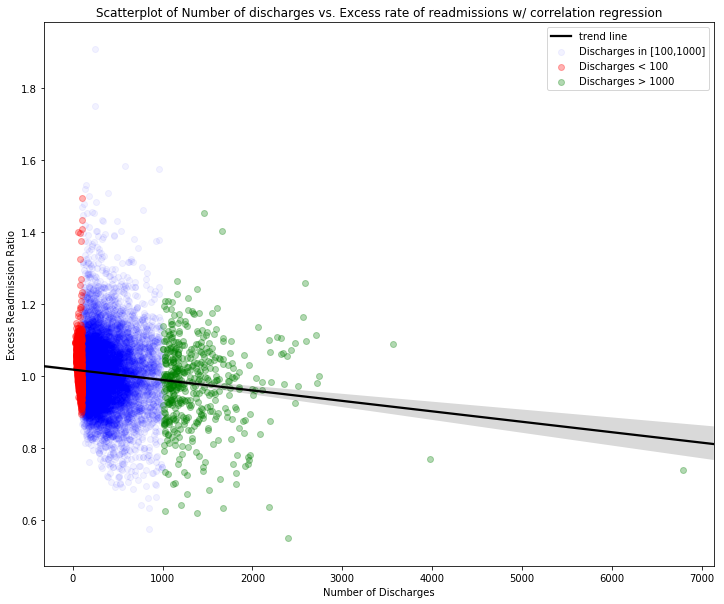

In [93]:
#the final graph to show information better
df_rest = df[(df['Number of Discharges']<=1000) & (df['Number of Discharges']>=100)]
fig, ax = plt.subplots(figsize=(12,10))

plt.scatter(df_rest['Number of Discharges'], df_rest['Excess Readmission Ratio'], c='blue', label='Discharges in [100,1000]', alpha=0.05)
plt.scatter(df_le100['Number of Discharges'], df_le100['Excess Readmission Ratio'], c='red', label="Discharges < 100 ", alpha=0.3)
plt.scatter(df_mo1000['Number of Discharges'], df_mo1000['Excess Readmission Ratio'], c='green', label='Discharges > 1000', alpha=0.3)
sns.regplot(df['Number of Discharges'], df['Excess Readmission Ratio'], scatter = False, line_kws={'color':'black'}, label = 'trend line')
plt.title('Scatterplot of Number of discharges vs. Excess rate of readmissions w/ correlation regression')
plt.legend(loc='upper right')
plt.show()

Finally we revise the plot to the one shown above, with 3 different sets of data (Number of Discharges < 100, [100, 1000], and > 1000) in red, blue and green scatters separately. We also add a regression line for the whole data, and therefore show the trend of decreasing ERR with increasing Number of Discharges. Whereas it might be hard for the audience to understand, in the original plot, what those shaded rectangles mean without additional notes and explanations.